# 1. Load in your dataset for the datathon
(in our case we will just make some fake data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
n_samples = 10000
n_predictors = 10
predictors = np.random.rand(n_samples,n_predictors)
# create a target variable with some noise
target = np.sum(predictors*np.random.rand(1, n_predictors), axis=1) + np.random.normal(0, 0.1, (n_samples,))
data = np.concatenate((predictors, target.reshape((-1,1))), axis=1)
col_names = ['x_'+str(i) for i in range(n_predictors)] + ['target']
print(np.shape(data))
dataPD = pd.DataFrame(data, columns=col_names)
dataPD.head()

(10000, 11)


,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,target
0,0.943602,0.452393,0.567289,0.329835,0.046681,0.840553,0.552273,0.475104,0.935472,0.501469,2.829199
1,0.709297,0.026926,0.119769,0.877721,0.613053,0.716205,0.702214,0.946881,0.812271,0.584844,3.321246
2,0.080944,0.734899,0.851052,0.195543,0.661112,0.829567,0.183250,0.426641,0.876994,0.867576,3.165667
3,0.148208,0.275667,0.521968,0.681458,0.469958,0.838551,0.355789,0.420015,0.309410,0.713847,2.705832
4,0.449393,0.363459,0.669108,0.443403,0.499658,0.708315,0.678936,0.267382,0.080361,0.246177,2.297017


# 2. Split into training, validation and testing

In [3]:
n_train = int(0.75*n_samples)
n_val = int(0.125*n_samples)
n_test = n_samples - n_train - n_val
print(n_samples)
print(n_train)
print(n_val)
print(n_test)

10000
7500
1250
1250


In [4]:
# mix up your data
dataPD = dataPD.sample(frac=1).reset_index(drop=True)

# add a data index
dataPD['data_index'] = np.arange(n_samples)

# mix up your data again
dataPD = dataPD.sample(frac=1).reset_index(drop=True)

# create a training and testing set
train_set = dataPD[0:n_train]
val_set = dataPD[n_train:n_train+n_val]
test_set = dataPD[n_train+n_val:]

val_and_test = dataPD[n_train:]


# write out the files for the participants
# create and validation+testing that doesn't have the target variable
val_and_test = val_and_test.drop(columns='target')
val_and_test = val_and_test.sample(frac=1).reset_index(drop=True)
val_and_test.to_csv('testing_data_no_target.csv', index=False)

# write out the files for the organizers
train_set.to_csv('train.csv', index=False)
val_set.to_csv('val.csv', index=False)
test_set.to_csv('test.csv', index=False)

val_and_test.head(15)

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,data_index
0,0.299013,0.027344,0.252109,0.798451,0.557161,0.083289,0.105412,0.347075,0.431720,0.797619,354
1,0.636396,0.993111,0.456410,0.479179,0.966854,0.054925,0.550054,0.921115,0.641687,0.915791,8395
2,0.723457,0.685873,0.368344,0.766843,0.591899,0.799533,0.985201,0.721537,0.429168,0.852557,8328
3,0.087915,0.437484,0.570625,0.973843,0.698735,0.596912,0.015346,0.683599,0.259600,0.453181,2754
4,0.198850,0.396748,0.153671,0.095613,0.165935,0.074371,0.574832,0.637962,0.891388,0.715395,4720
5,0.209437,0.889281,0.763019,0.093322,0.261384,0.961751,0.969255,0.723312,0.673844,0.361431,6726
6,0.743068,0.875279,0.913009,0.823144,0.604262,0.064290,0.048665,0.610273,0.463008,0.766185,4179
7,0.090026,0.420530,0.819524,0.920038,0.671701,0.343569,0.372418,0.115619,0.013829,0.249855,4156
8,0.102221,0.884774,0.209032,0.369329,0.178251,0.236729,0.968929,0.987217,0.555598,0.501704,1155
9,0.941592,0.737665,0.222702,0.990150,0.361245,0.351711,0.451682,0.470489,0.355812,0.928494,5986


# 3. Create a bundle

In [5]:
# get example bundle structure from github
!git clone -l -s https://github.com/ahinoamp/CodaLab_tutorial bundle
%cd bundle
!ls
! rm -r .git
%cd ../

Cloning into 'bundle'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 24 (delta 5), reused 21 (delta 5), pack-reused 0
Unpacking objects: 100% (24/24), done.
/content/bundle
competition.yaml  logo.jpg	 scoring_program_tst
data.html	  overview.html  scoring_program_val
evaluation.html   README.md	 terms_and_conditions.html
/content


In [6]:
# make two directories for the reference data
!mkdir 'bundle/reference_data_val'
!mkdir 'bundle/reference_data_tst'

In [7]:
# add the reference validation data
val_set[['data_index', 'target']].to_csv('/content/bundle/reference_data_val/val_ref.csv', index=False)

# add the reference testing data
test_set[['data_index', 'target']].to_csv('/content/bundle/reference_data_tst/test_ref.csv', index=False)

print('done with adding ref data')

done with adding ref data


# 4. Zip the bundle

In [8]:
import zipfile

! (cd bundle/reference_data_val/; zip -r ../reference_data_val.zip .)
! (cd bundle/reference_data_tst/; zip -r ../reference_data_tst.zip .)
! (cd bundle/scoring_program_tst/; zip -r ../scoring_program_tst.zip .)
! (cd bundle/scoring_program_val/; zip -r ../scoring_program_val.zip .)
! cd bundle && zip -r ../bundle.zip .

  adding: val_ref.csv (deflated 49%)
  adding: test_ref.csv (deflated 49%)
  adding: metadata (deflated 18%)
  adding: evaluate.py (deflated 58%)
  adding: README.md (deflated 45%)
  adding: metadata (deflated 18%)
  adding: evaluate.py (deflated 58%)
  adding: scoring_program_val.zip (stored 0%)
  adding: scoring_program_tst/ (stored 0%)
  adding: scoring_program_tst/metadata (deflated 18%)
  adding: scoring_program_tst/evaluate.py (deflated 58%)
  adding: reference_data_val/ (stored 0%)
  adding: reference_data_val/val_ref.csv (deflated 49%)
  adding: reference_data_val.zip (stored 0%)
  adding: README.md (deflated 45%)
  adding: overview.html (deflated 46%)
  adding: competition.yaml (deflated 60%)
  adding: reference_data_tst.zip (stored 0%)
  adding: scoring_program_tst.zip (stored 0%)
  adding: terms_and_conditions.html (deflated 39%)
  adding: evaluation.html (deflated 14%)
  adding: reference_data_tst/ (stored 0%)
  adding: reference_data_tst/test_ref.csv (deflated 49%)
  addin

#5. Create an example submission

In [9]:
train = pd.read_csv('train.csv')

In [10]:
#train a linear regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train.drop(columns='target'),
                             train['target'].values.reshape(-1, 1))

In [11]:
# predict on training data
y_hat = reg.predict(train.drop(columns='target'))

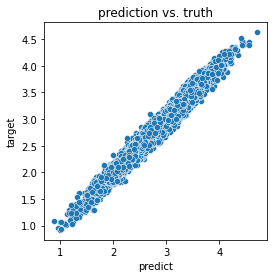

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(4,4))
train['predict'] = y_hat
sns.scatterplot(data=train, x="predict", y="target", ax=ax)
a = ax.set_title('prediction vs. truth')

In [13]:
# predict on testing data
test_data = pd.read_csv('testing_data_no_target.csv')
test_data.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,data_index
0,0.299013,0.027344,0.252109,0.798451,0.557161,0.083289,0.105412,0.347075,0.431720,0.797619,354
1,0.636396,0.993111,0.456410,0.479179,0.966854,0.054925,0.550054,0.921115,0.641687,0.915791,8395
2,0.723457,0.685873,0.368344,0.766843,0.591899,0.799533,0.985201,0.721537,0.429168,0.852557,8328
3,0.087915,0.437484,0.570625,0.973843,0.698735,0.596912,0.015346,0.683599,0.259600,0.453181,2754
4,0.198850,0.396748,0.153671,0.095613,0.165935,0.074371,0.574832,0.637962,0.891388,0.715395,4720


In [14]:
# make a prediction using the trained model
prediction = reg.predict(test_data.values)

In [16]:
# write the prediction to a zip file
test_data['target']=prediction
test_data[['data_index','target']].to_csv('predictions.csv')
zipfile.ZipFile('predictions.zip', mode='w').write("predictions.csv")

# you can also test the logic of the scoring mechanism here

In [17]:
truth = pd.read_csv("val.csv")
pred = pd.read_csv("predictions.csv")
merged = truth.merge(pred, on='data_index', suffixes=('_true', '_pred'), how='left')

result = np.mean(np.abs(merged['target_true'].values-merged['target_pred'].values))

if(np.isnan(result)):
    result = 404


In [18]:
result

0.07885198824796887